# Unit 5 - Financial Planning


In [3]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [4]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [5]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [6]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [7]:
# Fetch current BTC price
response_data = requests.get(btc_url).json()
price_btc = response_data['data']['1']['quotes']['USD']['price']

# Fetch current ETH price
response_data = requests.get(eth_url).json()
price_eth = response_data['data']['1027']['quotes']['USD']['price']

# Compute current value of my crpto
my_btc_value = my_btc * price_btc
my_eth_value = my_eth * price_eth

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $15838.15
The current value of your 5.3 ETH is $2049.51


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [8]:
# Current amount of shares
my_spy = 50
my_agg = 200

In [9]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2"
)

In [10]:
# Format current date as ISO format
now = pd.Timestamp("2020-10-23", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
data = alpaca.get_barset(
    tickers,
    timeframe,
    start = now,
    end = now
).df

# Preview DataFrame
data

AGG                                     SPY  \
                            open    high    low   close   volume    open   
2020-10-23 00:00:00-04:00  117.3  117.52  117.3  117.47  3482671  345.93   

                                                             
                             high     low   close    volume  
2020-10-23 00:00:00-04:00  345.99  343.13  345.76  38718140

In [11]:
# Pick AGG and SPY close prices
agg_close_price = data["AGG"]["close"][0]
spy_close_price = data["SPY"]["close"][0]

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $117.47
Current SPY closing price: $345.76


In [12]:
# Compute the current value of shares
my_spy_value = my_spy * spy_close_price
my_agg_value = my_agg * agg_close_price

# Print current value of share
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $17288.00
The current value of your 200 AGG shares is $23494.00


### Savings Health Analysis

In [13]:
# Set monthly household income
monthly_income = 12000

# Create savings DataFrame
df_savings = pd.DataFrame(
    [
        [my_btc_value + my_eth_value],
        [my_spy_value + my_agg_value]
    ],
    index = ["Crypto Value", "Shares"],
    columns = ["Amount"]
)

# Display savings DataFrame
display(df_savings)

,Amount
Crypto Value,17887.662
Shares,40782.000


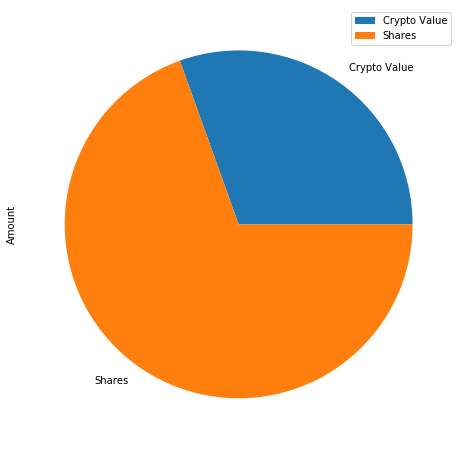

In [14]:
# Plot savings pie chart
df_savings.plot(kind = "pie", y = "Amount", figsize = (8,8))

In [15]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = df_savings["Amount"]["Crypto Value"] + \
    df_savings["Amount"]["Shares"]

# Validate saving health
if total_savings > emergency_fund:
    print("Congratulations for having enough money in this fund!")
elif total_savings == emergency_fund:
    print("Congratulations for reaching this financial goal.")
else:
    print(f"You are ${(emergency_fund - total_savings):0.2f} away from reaching your goal.")

Congratulations for having enough money in this fund!


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [16]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2015-08-07', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2020-08-07', tz='America/New_York').isoformat()

In [17]:
# Get 5 years' worth of historical data for SPY and AGG
df_stock_data = alpaca.get_barset(
    tickers,
    timeframe,
    start = start_date,
    end = end_date
).df

# Display sample data
df_stock_data.head()

AGG                                        \
                             open      high      low   close     volume   
2015-08-07 00:00:00-04:00  109.14  109.2750  109.035  109.21  2041167.0   
2015-08-10 00:00:00-04:00  109.15  109.1700  108.920  109.06  1149778.0   
2015-08-11 00:00:00-04:00  109.42  109.5765  109.284  109.42  1420907.0   
2015-08-12 00:00:00-04:00  109.55  109.7100  109.350  109.36  1468979.0   
2015-08-13 00:00:00-04:00  109.36  109.3651  109.110  109.15  1465173.0   

                              SPY                                     
                             open    high     low   close     volume  
2015-08-07 00:00:00-04:00  208.16  208.34  206.87  207.93   87669782  
2015-08-10 00:00:00-04:00  209.28  210.67  209.28  210.58   66755890  
2015-08-11 00:00:00-04:00  208.98  209.47  207.76  208.63   88424557  
2015-08-12 00:00:00-04:00  207.11  209.14  205.36  208.89  136171450  
2015-08-13 00:00:00-04:00  208.73  209.55  208.01  208.63   77197796

In [18]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
mc = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 30*252
)

In [19]:
# Printing the simulation input data
df_stock_data.head()

AGG                                        \
                             open      high      low   close     volume   
2015-08-07 00:00:00-04:00  109.14  109.2750  109.035  109.21  2041167.0   
2015-08-10 00:00:00-04:00  109.15  109.1700  108.920  109.06  1149778.0   
2015-08-11 00:00:00-04:00  109.42  109.5765  109.284  109.42  1420907.0   
2015-08-12 00:00:00-04:00  109.55  109.7100  109.350  109.36  1468979.0   
2015-08-13 00:00:00-04:00  109.36  109.3651  109.110  109.15  1465173.0   

                              SPY                                     
                             open    high     low   close     volume  
2015-08-07 00:00:00-04:00  208.16  208.34  206.87  207.93   87669782  
2015-08-10 00:00:00-04:00  209.28  210.67  209.28  210.58   66755890  
2015-08-11 00:00:00-04:00  208.98  209.47  207.76  208.63   88424557  
2015-08-12 00:00:00-04:00  207.11  209.14  205.36  208.89  136171450  
2015-08-13 00:00:00-04:00  208.73  209.55  208.01  208.63   77197796

In [20]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
mc.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.991032,0.983162,1.002079,1.004712,1.000995,1.013417,0.995413,1.008175,1.001271,1.005689,...,0.995924,1.000354,1.010800,0.988976,0.997468,1.004058,0.999169,0.999180,1.006417,0.998850
2,0.988284,0.985814,1.014323,1.010257,0.995083,1.015934,1.000733,1.016694,0.997353,1.001310,...,0.995264,1.009336,1.019636,0.987157,0.989186,1.005216,0.987473,1.007089,1.020396,0.998963
3,0.990803,0.977368,1.003169,1.001977,0.985359,1.014569,1.002456,1.019436,1.003202,1.003489,...,0.984735,1.008112,1.019900,0.966700,0.999364,0.994670,0.989177,1.011529,1.027041,0.995755
4,0.987510,0.963647,1.007100,0.997800,0.996835,1.005063,1.008506,1.016908,1.013536,1.004247,...,0.992112,1.009863,1.017807,0.960773,0.992248,0.986180,0.992912,1.007195,1.030153,0.985395
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,6.071726,3.694377,11.461523,24.313170,0.640560,7.409083,15.208488,6.331946,14.141914,3.115996,...,10.220793,17.501415,26.602496,3.739660,4.176949,11.800909,5.557322,4.910194,18.746401,9.885067
7557,6.094896,3.694478,11.475465,24.192925,0.630527,7.500376,15.158560,6.275698,14.142806,3.133813,...,10.273664,17.637017,26.584055,3.765767,4.171374,11.802472,5.512067,4.916814,18.898504,9.990093
7558,6.072484,3.709719,11.383836,24.286061,0.629259,7.435977,15.140430,6.168946,14.045700,3.132596,...,10.238729,17.552885,26.462260,3.750015,4.131418,11.768280,5.567935,4.906363,18.855533,10.012072
7559,6.101047,3.723935,11.319849,24.059081,0.639575,7.397873,15.112298,6.190492,14.134916,3.137048,...,10.328450,17.708418,26.476230,3.796164,4.168676,11.944809,5.539137,4.889378,18.844697,10.056147


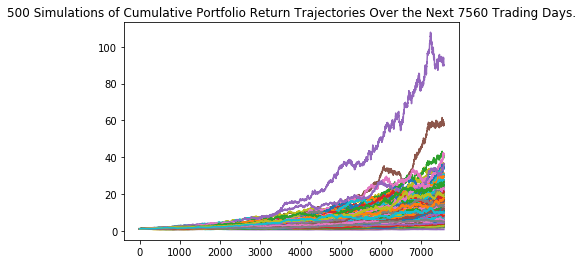

In [21]:
# Plot simulation outcomes
line_plot = mc.plot_simulation()

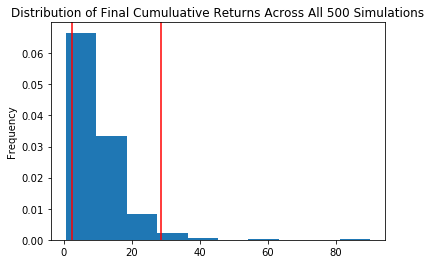

In [22]:
# Plot probability distribution and confidence intervals
dist_plot = mc.plot_distribution()

### Retirement Analysis

In [23]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = mc.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           500.000000
mean             10.035975
std               7.733786
min               0.643287
25%               5.222391
50%               8.255637
75%              12.430259
max              90.096674
95% CI Lower      2.334411
95% CI Upper     28.655861
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [24]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(tbl[8]*20000,2)
ci_upper = round(tbl[9]*20000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $46688.22 and $573117.22


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [25]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(tbl[8]*30000,2)
ci_upper = round(tbl[9]*30000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $70032.33 and $859675.82


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [26]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
mc_5year = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 5*252
)

In [27]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
mc_5year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.991207,1.009481,0.995723,1.009715,0.996451,0.999962,0.996001,1.004426,1.008543,0.990635,...,0.999225,0.996263,0.997254,1.003149,1.001504,0.999892,0.996124,0.993601,1.004727,0.999165
2,0.998074,1.010314,0.991732,1.009038,0.986703,1.004647,1.005720,1.008651,1.015378,0.993838,...,0.992605,1.003019,0.997654,1.003744,1.009170,0.999316,0.997193,0.998692,1.010955,1.001166
3,1.001946,1.003110,0.976113,1.005352,0.981779,1.023273,1.012541,1.003709,1.005147,0.995197,...,0.994750,1.010553,1.003509,1.003119,1.002753,0.995443,0.990836,0.994769,1.019857,1.004612
4,0.987033,1.007206,0.964867,0.999088,0.986724,1.021053,1.017717,1.013607,1.009137,0.996286,...,0.988242,1.011711,1.008441,1.005426,1.003404,0.994021,0.994405,0.973653,1.020717,0.999866
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.135691,2.522211,2.187133,1.048398,1.533547,1.347583,1.033421,1.389234,0.973129,1.068449,...,0.910737,1.558141,0.897686,1.621986,1.439852,1.546245,1.345820,1.093398,1.393220,1.376337
1257,1.142527,2.549561,2.164116,1.039644,1.548629,1.348338,1.037699,1.388206,0.972658,1.065125,...,0.895377,1.552879,0.903550,1.621731,1.436273,1.531290,1.347217,1.095437,1.393635,1.373581
1258,1.132704,2.552862,2.188734,1.043993,1.543662,1.333287,1.036786,1.375794,0.973259,1.063328,...,0.903854,1.564402,0.907784,1.618997,1.443053,1.534410,1.354986,1.108041,1.390923,1.379387
1259,1.132548,2.539499,2.190869,1.033256,1.517017,1.322686,1.039660,1.382661,0.964379,1.063261,...,0.903755,1.541322,0.905036,1.617123,1.447735,1.519930,1.355531,1.119015,1.385330,1.382057


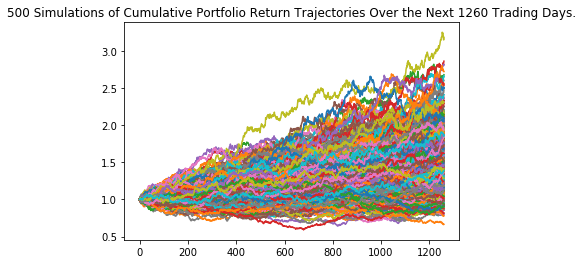

In [28]:
# Plot simulation outcomes
line_plot_5year = mc_5year.plot_simulation()

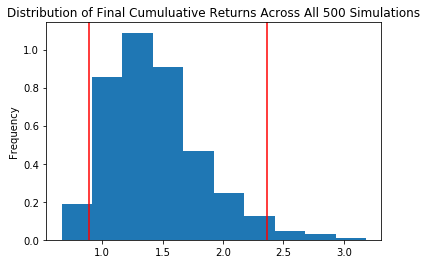

In [29]:
# Plot probability distribution and confidence intervals
dist_plot_5year = mc_5year.plot_distribution()

In [30]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl_5year = mc_5year.summarize_cumulative_return()

# Print summary statistics
print(tbl_5year)

count           500.000000
mean              1.446205
std               0.392541
min               0.664795
25%               1.160957
50%               1.391799
75%               1.646994
max               3.182463
95% CI Lower      0.889439
95% CI Upper      2.360052
Name: 1260, dtype: float64


In [31]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(tbl_5year[8]*20000,2)
ci_upper_five = round(tbl_5year[9]*20000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 5 years will end within in the range of $17788.79 and $47201.03


### Ten Years Retirement Option

In [32]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
mc_10year = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 10*252
)

In [33]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
mc_10year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.001627,0.999522,0.995073,1.011048,1.008979,1.005821,0.997246,0.995365,1.004794,1.006073,...,1.003779,1.000572,0.989890,1.008685,0.991477,1.002508,1.018959,1.008509,1.003326,0.997374
2,1.009989,0.994689,0.993649,1.015581,1.019947,1.004517,1.008344,0.984263,1.005544,1.007073,...,1.001111,0.995118,0.984648,1.005086,0.988484,0.997647,1.017291,1.008529,1.013138,0.982354
3,1.006238,1.001132,0.990009,1.013155,1.012264,1.003228,1.003776,0.983466,1.010344,1.011395,...,1.009657,0.997006,0.985149,1.017306,0.985110,1.004185,1.015770,0.998268,1.006971,0.989886
4,1.009511,1.000208,0.990068,1.027226,1.010830,1.013123,0.995900,0.989577,1.009038,1.020250,...,1.001623,0.994556,0.998201,1.017752,0.990038,0.994572,1.010015,1.000886,0.993174,0.983112
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,2.037751,4.039953,4.442720,1.262532,3.617533,2.522688,3.153355,1.888212,2.534108,1.359270,...,3.870016,3.512685,1.984887,1.666577,1.623520,1.104557,2.961485,2.961344,2.631839,2.276027
2517,2.039226,4.032686,4.440707,1.231668,3.628041,2.487042,3.170827,1.879349,2.536607,1.348497,...,3.809224,3.526307,2.007659,1.658281,1.602075,1.113665,2.949825,2.940805,2.621922,2.294893
2518,2.046956,4.052300,4.394306,1.241666,3.633269,2.538803,3.188812,1.878722,2.573661,1.347753,...,3.849690,3.515008,2.003001,1.632046,1.588373,1.122209,2.934923,2.948813,2.617000,2.303937
2519,2.053584,4.019263,4.400524,1.236940,3.644387,2.541734,3.183769,1.844009,2.555854,1.344500,...,3.898253,3.486087,1.996114,1.628769,1.588581,1.097486,2.962592,2.932118,2.640943,2.325370


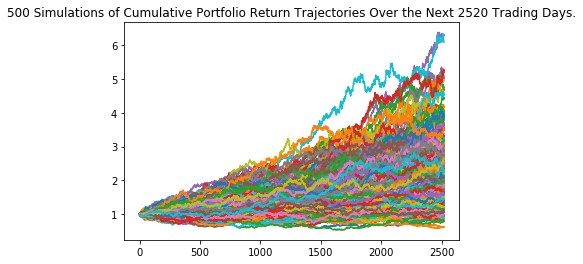

In [34]:
# Plot simulation outcomes
line_plot_10year = mc_10year.plot_simulation()

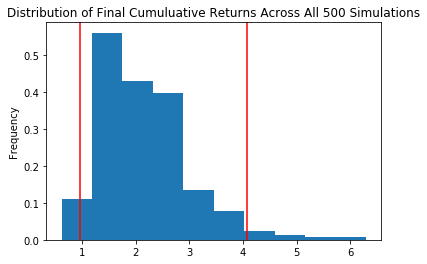

In [38]:
# Plot probability distribution and confidence intervals
dist_plot_10year = mc_10year.plot_distribution()

In [39]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl_10year = mc_10year.summarize_cumulative_return()

# Print summary statistics
print(tbl_10year)

count           500.000000
mean              2.152001
std               0.832659
min               0.613030
25%               1.532379
50%               2.023481
75%               2.593916
max               6.293682
95% CI Lower      0.964159
95% CI Upper      4.078064
Name: 2520, dtype: float64


In [40]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(tbl_10year[8]*20000,2)
ci_upper_ten = round(tbl_10year[9]*20000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 10 years will end within in the range of $19283.18 and $81561.28
